In [67]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib notebook

In [53]:
out_of_sample_start_date = pd.to_datetime('2017-07-01')

<IPython.core.display.Javascript object>


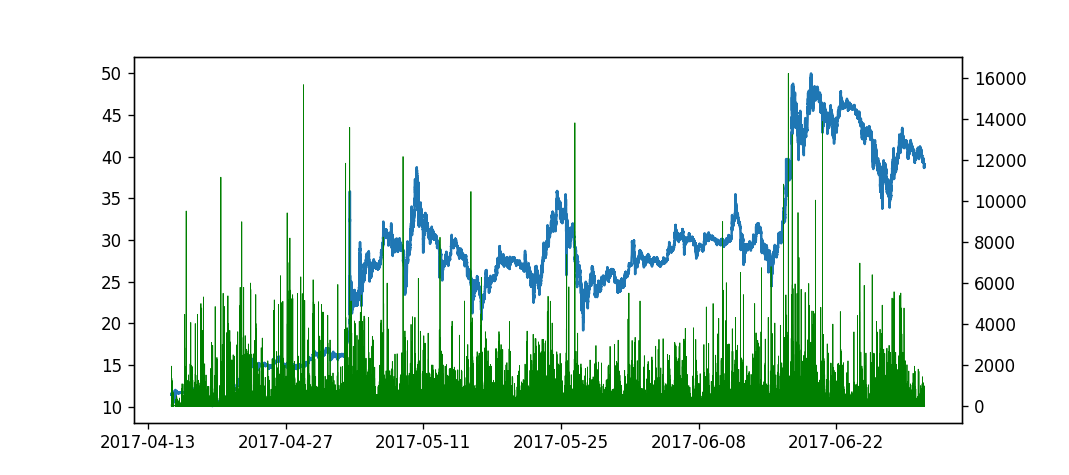

In [56]:
out_of_sample_start_date = pd.to_datetime('2017-07-01')

price = pd.read_csv(r'price_history.csv').set_index('time')
price.index = pd.to_datetime(price.index)
price.sort_index(ascending=True, inplace=True)
price = price[price.index<out_of_sample_start_date]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(price['price'])
ax2.plot(price['vol'], color='g', linewidth=0.5)

## Basic distribution

count    496331.000000
mean          0.000056
std           0.046800
min          -4.130000
25%          -0.010000
50%           0.000000
75%           0.010000
max           3.990000
Name: raw_ret, dtype: float64


<IPython.core.display.Javascript object>


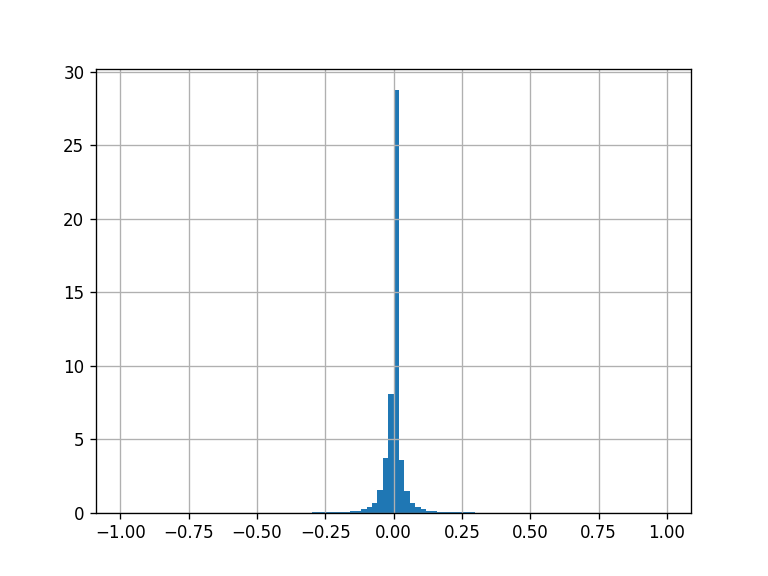

<IPython.core.display.Javascript object>


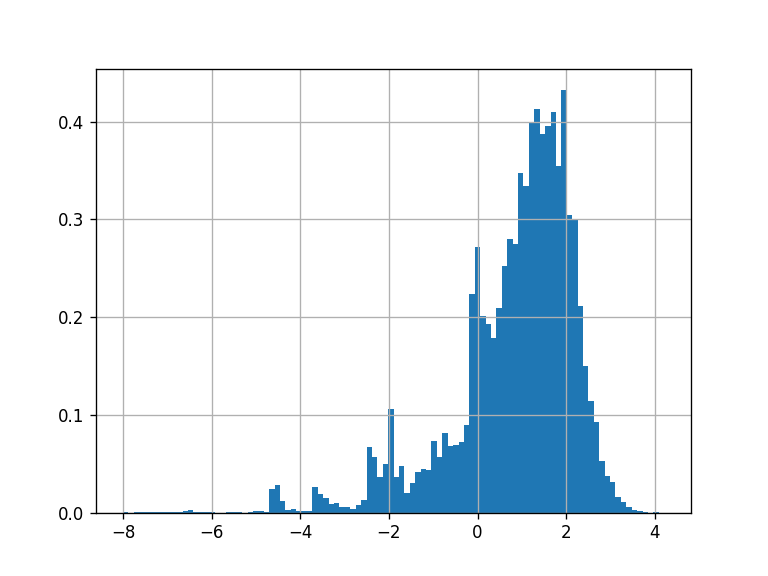

In [70]:
price['raw_ret'] = price['price'].diff()
print price['raw_ret'].describe()
price['raw_ret'][np.abs(price['raw_ret'])<1.].hist(bins=100, normed=True)
plt.figure()
np.log10(price['vol']).hist(bins=100, normed=True)

## Check any periodic behavior

In [71]:
price['hour'] = price.index.map(lambda x: x.hour)
price['dayofweek'] = price.index.map(lambda x: x.dayofweek)
price_by_hour = price.groupby('hour').sum()
price_by_dayofweek = price.groupby('dayofweek').sum()

<IPython.core.display.Javascript object>


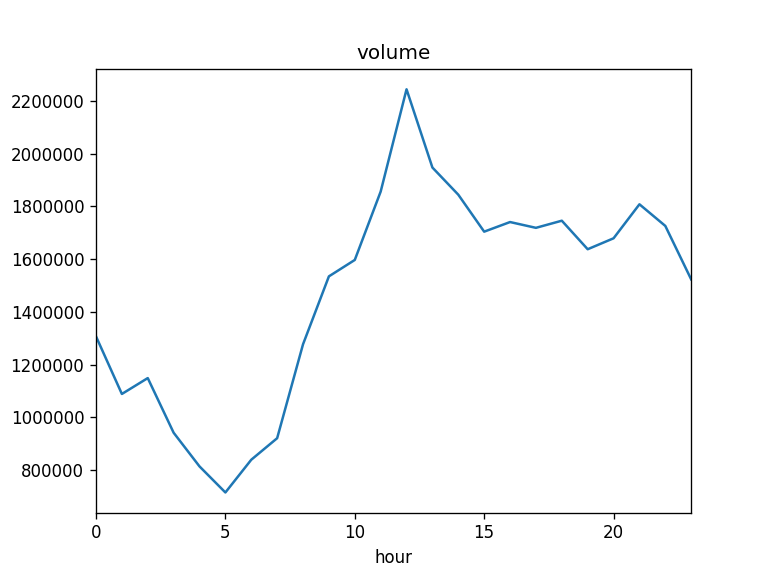

In [72]:
price_by_hour['vol'].plot()
plt.title('volume')

<IPython.core.display.Javascript object>


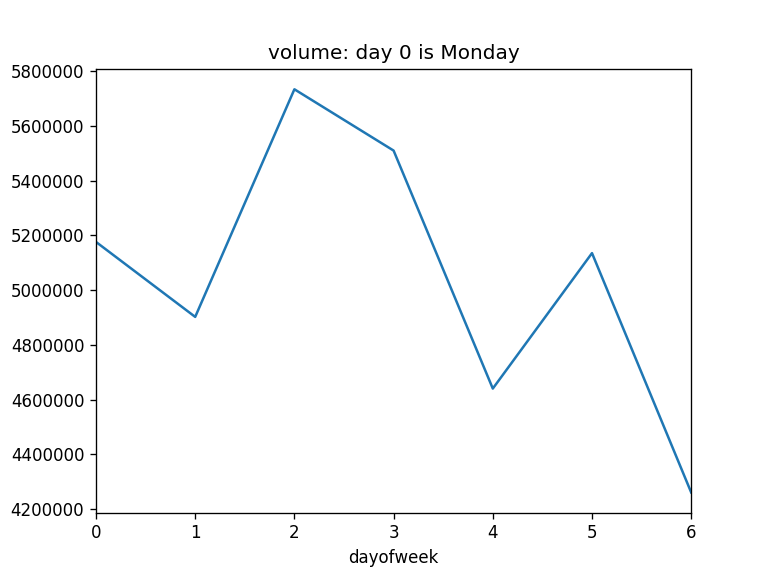

In [73]:
price_by_dayofweek['vol'].plot()
plt.title('volume: day 0 is Monday')

<IPython.core.display.Javascript object>


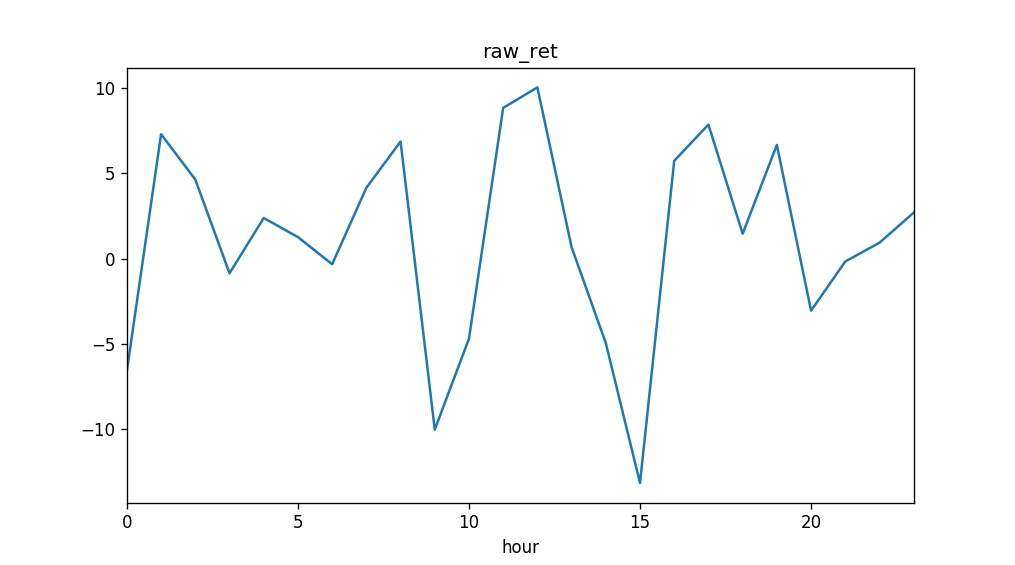

In [74]:
price_by_hour['raw_ret'].plot()
plt.title('raw_ret')

<IPython.core.display.Javascript object>


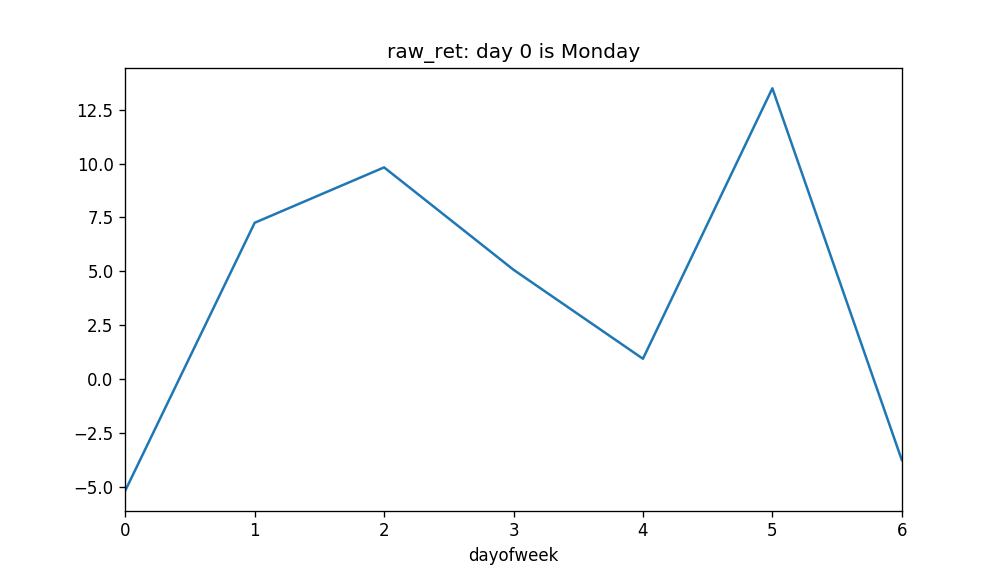

In [75]:
price_by_dayofweek['raw_ret'].plot()
plt.title('raw_ret: day 0 is Monday')

In [76]:
price_by_hour_and_dayofweek = price.groupby(['hour', 'dayofweek']).sum()

<IPython.core.display.Javascript object>


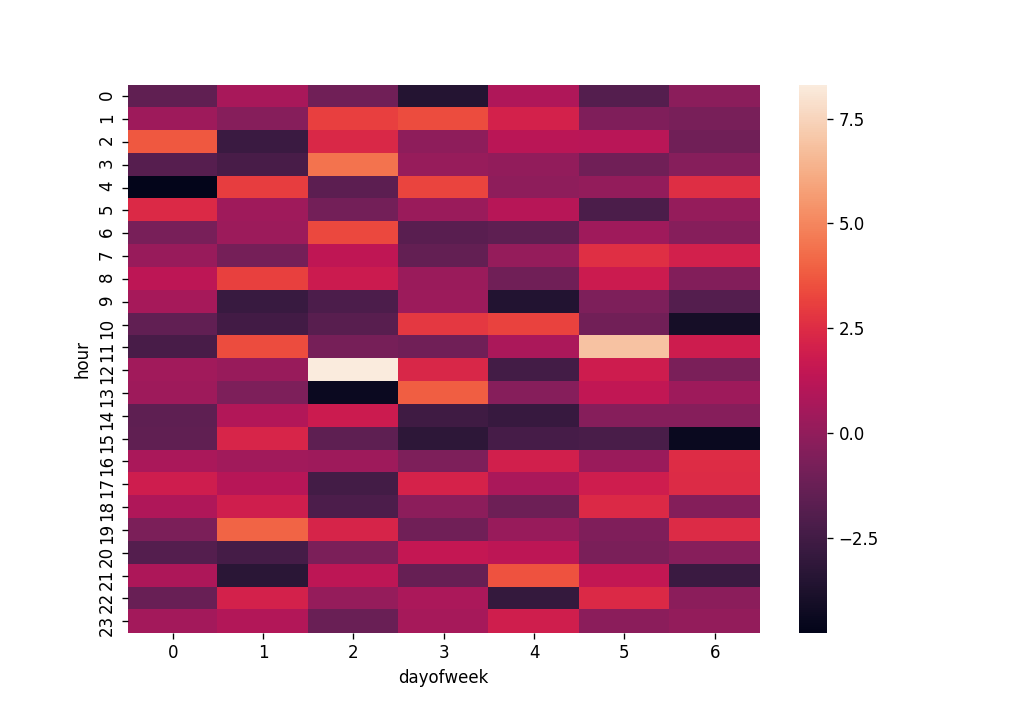

In [77]:
sns.heatmap(price_by_hour_and_dayofweek['raw_ret'].unstack())

<IPython.core.display.Javascript object>


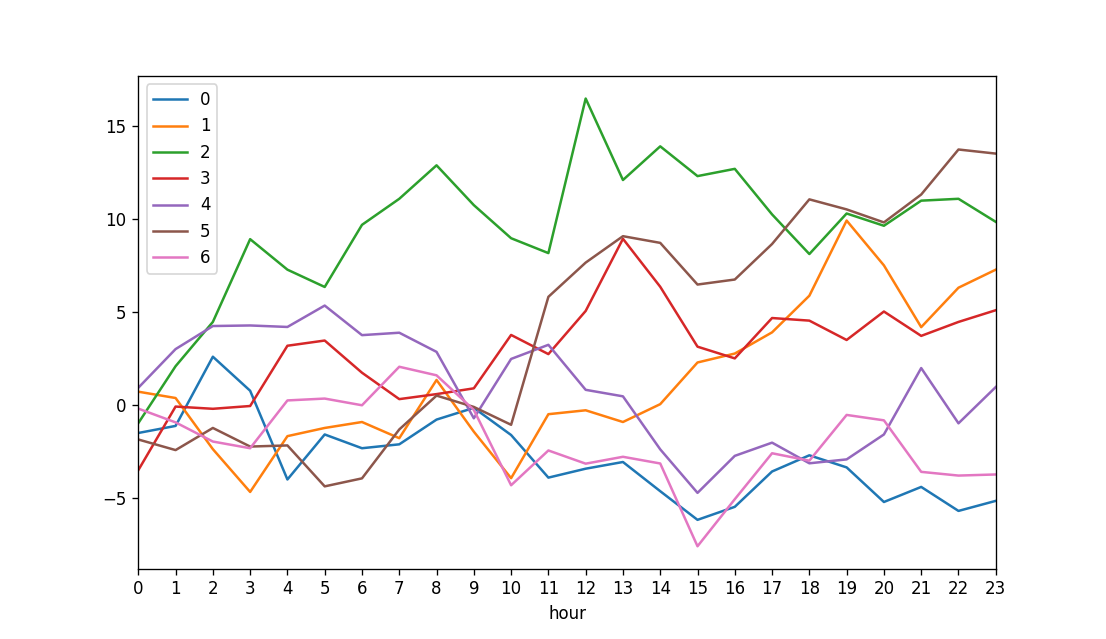

In [83]:
for i in range(7):
    price_by_hour_and_dayofweek['raw_ret'].unstack()[i].cumsum().plot(label='%d' %i)
    plt.xticks(range(24))
    plt.legend()